<a href="https://colab.research.google.com/github/chaurasiauttkarsh/Machine-Learning/blob/master/4_1_Supervised_Learning_kNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**k-Nearest Neighbors**

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

**k-Neighbors classification**

In its simplest version, the k-NN algorithm only considers exactly one nearest neigh‐ bor, which is the closest training data point to the point we want to make a prediction for. The prediction is then simply the known output for this training point. Figure illustrates this for the case of classification on the forge dataset:

In [1]:
!pip install mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


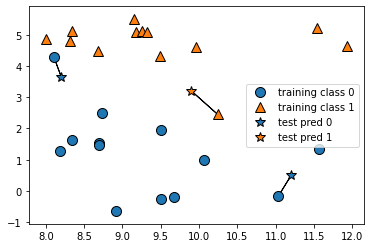

In [2]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=1)

Here, we added three new data points, shown as stars. For each of them, we marked the closest point in the training set. The prediction of the one-nearest-neighbor algo‐ rithm is the label of that point (shown by the color of the cross).

Instead of considering only the closest neighbor, we can also consider an arbitrary number, k, of neighbors. This is where the name of the k-nearest neighbors algorithm comes from. When considering more than one neighbor, we use voting to assign a label. This means that for each test point, we count how many neighbors belong to class 0 and how many neighbors belong to class 1. We then assign the class that is more frequent: in other words, the majority class among the k-nearest neighbors. 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


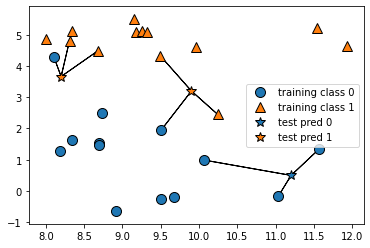

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Again, the prediction is shown as the color of the cross. You can see that the predic‐ tion for the new data point at the top left is not the same as the prediction when we used only one neighbor.
While this illustration is for a binary classification problem, this method can be applied to datasets with any number of classes. For more classes, we count how many neighbors belong to each class and again predict the most common class.

**Hands-On Application**

K-NN over forge dataset


**Step 1 - Loading the data**

In [4]:
X, y = mglearn.datasets.make_forge()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


**Step 2 - Train-Test Split**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Step 3 - Building the Model**

Next, we import and instantiate the class. This is when we can set parameters, like the number of neighbors to use. 

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

**Step 4 - Training the model**

Now, we fit the classifier using the training set. For KNeighborsClassifier this means storing the dataset, so we can compute neighbors during prediction:

In [7]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**Step 5 - Making the predictions**

To make predictions on the test data, we call the predict method. For each data point in the test set, this computes its nearest neighbors in the training set and finds the most common class among these:

In [8]:
print("Test set prediction {}".format(clf.predict(X_test)))

Test set prediction [1 0 1 0 1 0 0]


**Step 6 - Evaluating the model**

In [9]:
print("Test set accuracy : {}".format(clf.score(X_test, y_test)))

Test set accuracy : 0.8571428571428571


**Analysing k-neighbors classifier**

For two-dimensional datasets, we can also illustrate the prediction for all possible test points in the xy-plane. We color the plane according to the class that would be assigned to a point in this region. This lets us view the decision boundary, which is the divide between where the algorithm assigns class 0 versus where it assigns class 1.

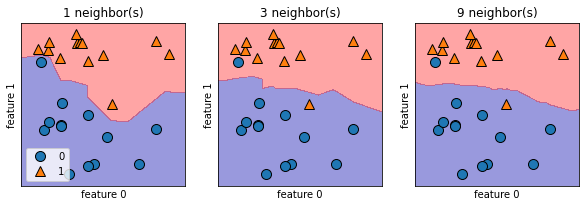

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
  # the fit method returns the object self, so we can instantiate
  # and fit in one line
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) 
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) 
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

As you can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity, and using many neighbors corresponds to low model complexity. If you consider the extreme case where the number of neighbors is the number of all data points in the training set, each test point would have exactly the same neighbors (all training points) and all predictions would be the same: the class that is most frequent in the training set.

Let’s investigate whether we can confirm the connection between model complexity and generalization that we discussed earlier. We will do this on the real-world Breast Cancer dataset. We begin by splitting the dataset into a training and a test set. Then we evaluate training and test set performance with different numbers of neighbors.

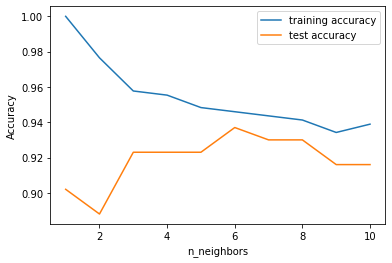

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = [] 
test_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
  clf.fit(X_train, y_train)
  # record training set accuracy 
  training_accuracy.append(clf.score(X_train, y_train)) 
  # record generalization accuracy 
  test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy") 
plt.plot(neighbors_settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. While real-world plots are rarely very smooth, we can still recognize some of the characteristics of overfitting and underfitting (note that because considering fewer neighbors corresponds to a more complex model, the plot is horizontally flipped relative to the illustration). Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around six neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.

**k-Neighbors Regression**

There is also a regression variant of the k-nearest neighbors algorithm. Again, let’s start by using the single nearest neighbor, this time using the wave dataset. We’ve added three test data points as green stars on the x-axis. The prediction using a single neighbor is just the target value of the nearest neighbor. These are shown as blue stars in figure.

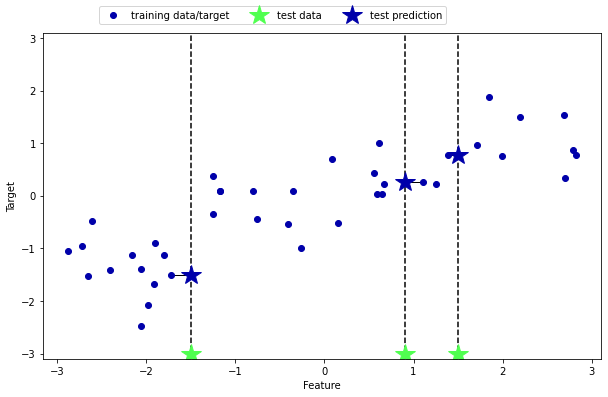

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

Again, we can use more than the single closest neighbor for regression. When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors

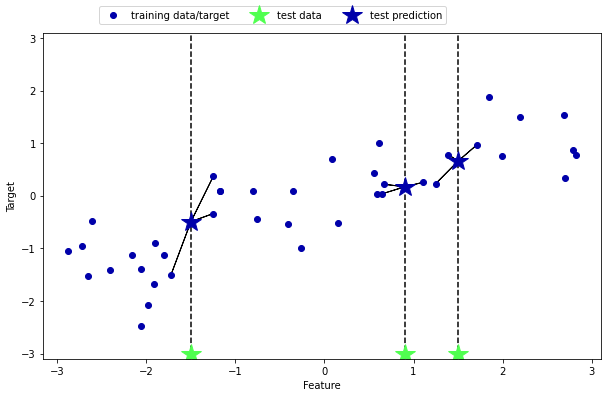

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

**Hands-On Application**

**Step 1 - Loading the data**

In [0]:
X, y = mglearn.datasets.make_wave(n_samples=40)

**Step 2 - Train-Test Split**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

**Step 3 - Building the Model**

The k-nearest neighbors algorithm for regression is implemented in the KNeighborsRegressor class in scikit-learn. It’s used similarly to KNeighborsClassifier:

In [0]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)

**Step 4 - Training the Model**

In [18]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

**Step 5 - Making the Predictions**

In [20]:
print("Test set prediction {}".format(reg.predict(X_test)))

Test set prediction [ 1.38930649 -1.45950779  0.34412716  0.18836016 -1.50149481  0.18836016
 -0.47317977  1.13671923 -1.53274815  0.95791719]


**Step 6 - Evaluating the Model**

In [21]:
print("Test score : {}".format(reg.score(X_test, y_test)))

Test score : 0.7594822313629138


**Analyzing k-Neighbors Regressor**

For our one-dimensional dataset, we can see what the predictions look like for all possible feature values. To do this, we create a test dataset consisting of many points on the x-axis, which corresponds to the single feature

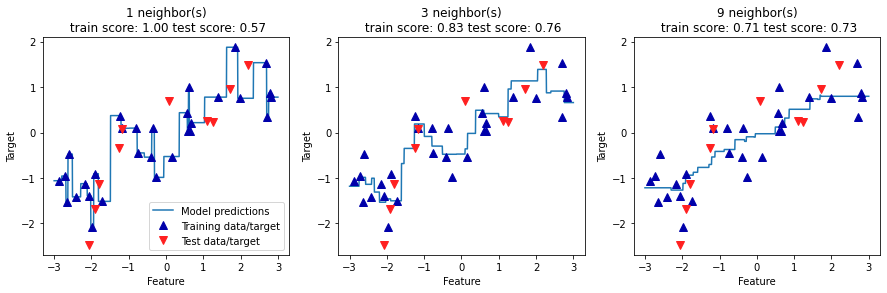

In [23]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3 
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
  # make predictions using 1, 3, or 9 neighbors
  reg = KNeighborsRegressor(n_neighbors=n_neighbors) 
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8) 
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
  ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train),reg.score(X_test, y_test))) 
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

As we can see from the plot, using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points. This leads to a very unsteady prediction. Considering more neighbors leads to smoother predictions, but these do not fit the training data as well.

**Strengths, weakness and parameters kNearestNeighbors(Classifier and Regressor)**

In principle, there are two important parameters to the KNeighbors classifier: the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. Choosing the right distance measure is somewhat beyond the scope of this book. By default, Euclidean distance is used, which works well in many settings.

One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques. Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow. When using the k-NN algorithm, it’s important to preprocess your data(Preprocessing will be taught in coming tutorials). This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets).